### Filling in Missing Values

Fill in missing values in bmi 

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np

data = pd.read_csv('/Users/hp/Desktop/Python Projects/Stroke Prediction Dataset.csv')


In [2]:
#showing first 5 rows of data
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.describe()
#there are missing data in bmi

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
#fill in missing age data with median value
def fill_na_median(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)

fill_na_median(data['bmi'])

#check the result
data['bmi'].describe()

count    5110.000000
mean       28.862035
std         7.699562
min        10.300000
25%        23.800000
50%        28.100000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

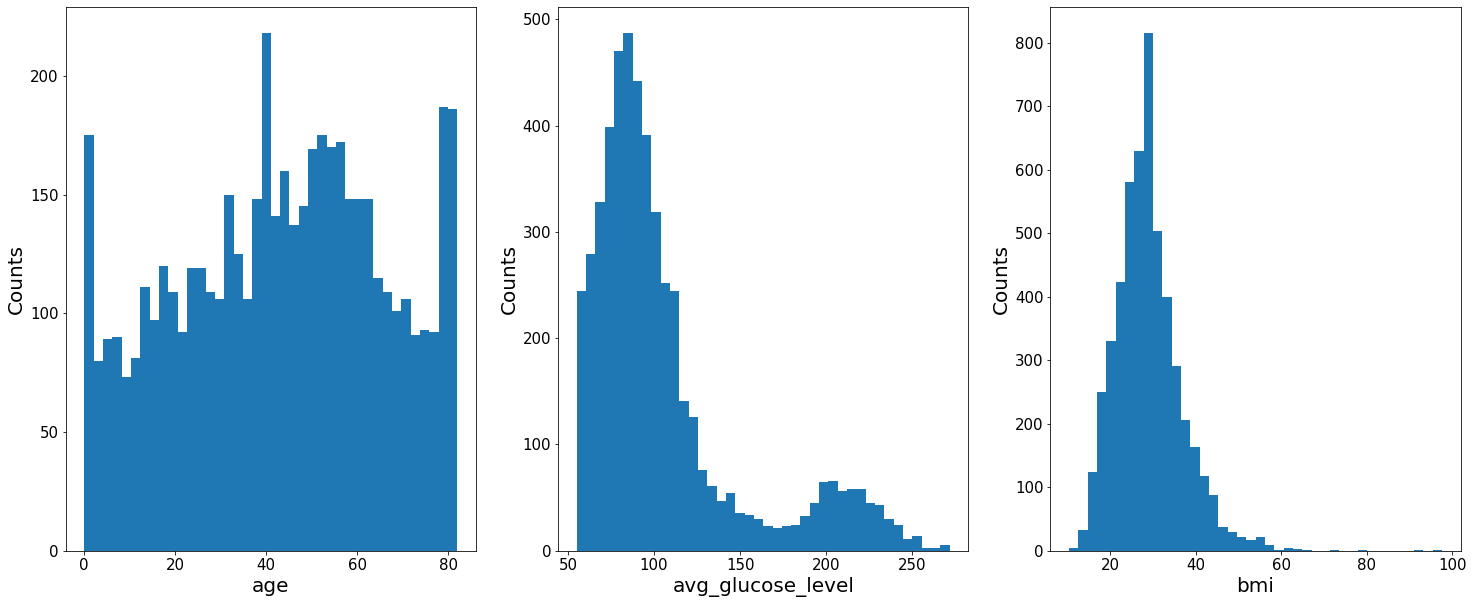

In [6]:
#import visualization packages
import matplotlib.pyplot as plt

#set up figure size
%matplotlib inline
#state figure size
plt.rcParams['figure.figsize'] = (25,10)

#make subplots
fig, axes=plt.subplots(nrows=1, ncols=3)

#histogram x-axis
num_features=['age', 'avg_glucose_level', 'bmi']
xaxes = num_features
#histogram y-axis
yaxes = ['Counts', 'Counts', 'Counts']

#draw histogram
axes = axes.ravel() #functions returns contiguous flattened array
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
    

### Log Transformation

From the histogram, we can see that distriution of "bmi" is right skewed. Use log transformation to reduce skewness. <br>
Log transformation is a data transformation method in which it replaces each variable x with a log(x). The choice of the logarithm base is usually left up to the analyst and it would depend on the purposes of statistical modeling. In this article, we will focus on the natural log transformation. The nature log is denoted as ln.<br>
When our original continuous data do not follow the bell curve, we can log transform this data to make it as “normal” as possible so that the statistical analysis results from this data become more valid. 

In [10]:
#import package 
import numpy as np

#log transformation 
def log_transformation(data): 
    return data.apply(np.log1p)

data['bmi_log1p']= log_transformation(data['bmi']) #log transform

#check the data
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,bmi_log1p
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728,3.365068
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320,0.250511
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,2.424803
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000,3.210844
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000,3.370738
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000,3.520461
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,4.591071


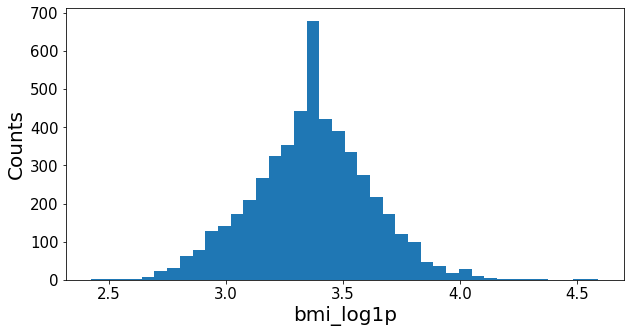

In [11]:
#check the distribution using histogram
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize']=(10,5)

plt.hist(data['bmi_log1p'],bins=40)
plt.xlabel('bmi_log1p',fontsize=20)
plt.ylabel('Counts',fontsize=20)
plt.tick_params(axis='both', labelsize=15)

We can see from the figure above, after log-transformation the data is much less skewed.

### ONE HOT ENCODING FOR CATEGORICAL FEATURES
<br>
I will use One Hot Encoding on the categorical features to transform them into numbers. 

In [17]:
#get the categorical data
cat_features = ['gender', 'work_type', 'Residence_type','smoking_status'] #declare array with categorical data
data_cat=data[cat_features]
data_cat=data_cat.replace({'smoking_Status': {1:'never smoked',2:'formerly smoked', 3:'smokes', 4:'Unknown'}},
                          {'work_type':{1:'Private',2:'Self-employed',3:'Govt_job'}})
#smoking type more than 2 values, make each value as separate columns -> one hot encoding

#one hot encoding
data_cat_dummies = pd.get_dummies(data_cat)

#check the data 
data_cat_dummies.head()

,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
1,1,0,0,0,0,0,1,0,1,0,0,0,1,0
2,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,1,0,0,0,0,1,0,0,0,1,0,0,0,1
4,1,0,0,0,0,0,1,0,1,0,0,0,1,0
